In [1]:
from typing import List
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.ticker as mticker
import os

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 20})

In [2]:
MAIN_DIR = "../../"

plot_dir = f"{MAIN_DIR}/plots/GoF/23Oct23"
_ = os.system(f"mkdir -p {plot_dir}")

In [38]:
cards_dir = "23May13MP"

file = uproot.concatenate(
    f"/ospool/cms-user/yuzhe/BoostedHWW/prediction/boostedHWW/combine/scripts/f_test/cards/nTF_3/higgsCombineData.GoodnessOfFit.mH125.root"
)

data_ts = file["limit"][0] # data test statistic

file= uproot.concatenate(
    f"/ospool/cms-user/yuzhe/BoostedHWW/prediction/boostedHWW/combine/scripts/f_test/cards/nTF_3/higgsCombineToys3.GoodnessOfFit.mH125.667.root"
)
# //
toy_ts = np.array(file["limit"])  # toy test statistics

In [39]:
data_ts 

53.21068678796291

In [40]:
# toy_ts = np.array(file["limit"])
toy_ts

array([59.04924428, 50.87244449, 35.62063251, 43.74984267, 48.62227257,
       55.89418016, 49.03921308, 37.62643166, 49.13716261, 38.22200106,
       69.01655734, 33.34250145, 28.26494334, 42.63289531, 38.88074082,
       57.35701315, 52.65678712, 67.30026168, 47.9218482 , 55.15443428,
       45.26699173, 47.78382043, 60.40985881, 36.40784812, 56.83491334,
       45.69379327, 66.50044422, 69.66988797, 66.79368383, 53.97468154,
       49.37692097, 43.8836746 , 33.92066997, 47.06108718, 33.39661339,
       41.64218814, 41.42547742, 44.67733399, 50.9899362 , 38.46273685,
       50.03155226, 37.66459146, 38.84180184, 44.56344325, 55.52967881,
       37.37350681, 59.43816291, 43.44281479, 36.89420679, 51.67781369,
       66.4042614 , 46.58740433, 38.34748744, 49.97145303, 53.72020582,
       54.35146926, 57.37270828, 28.69182587, 43.55297367, 58.54552774,
       39.93754003, 46.13657867, 46.33405564, 52.0596825 , 43.41115447,
       43.4399607 , 41.56211761, 41.51367982, 43.17605607, 65.02

In [91]:
def p_value(data_ts: float, toy_ts: List[float]):
    return np.mean(toy_ts >= data_ts)

In [92]:
pval = p_value(data_ts, toy_ts)
pval

0.0

In [93]:
plot_max = max(np.max(toy_ts), data_ts)
plot_min = min(np.min(toy_ts), data_ts)

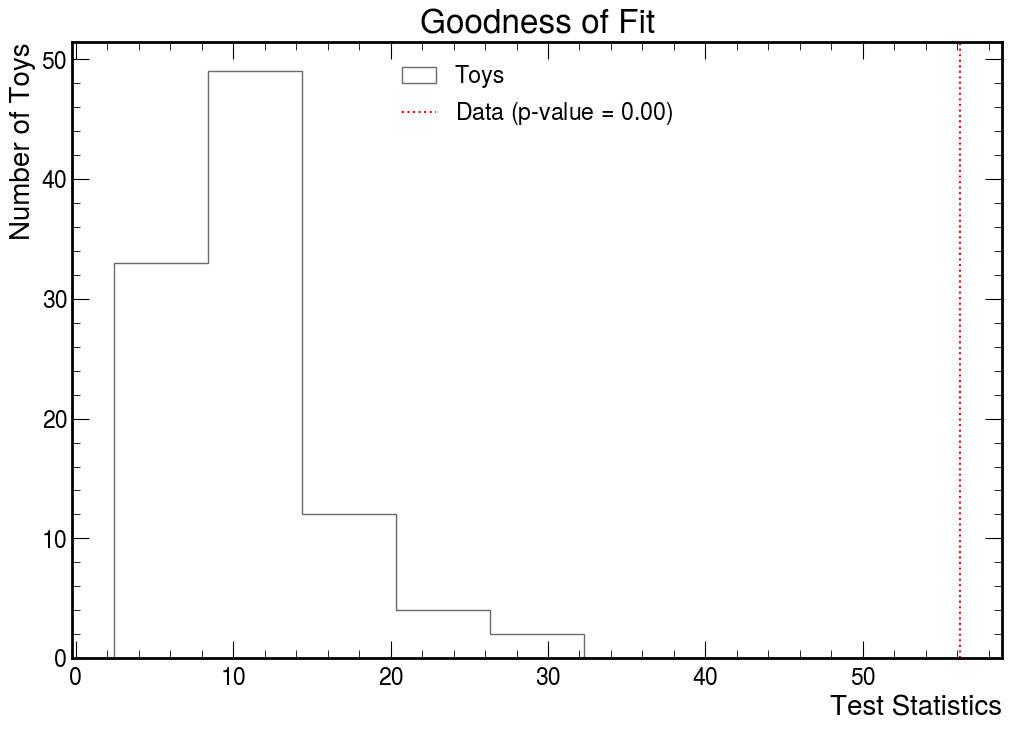

In [94]:
plt.figure(figsize=(12, 8))
_ = plt.hist(
    toy_ts, np.linspace(plot_min, plot_max, 10), color="dimgrey", histtype="step", label="Toys"
)
plt.axvline(data_ts, color="red", linestyle=":", label=rf"Data ($p$-value = {pval:.2f})")
_ = plt.legend()
plt.title("Goodness of Fit")
plt.ylabel("Number of Toys")
plt.xlabel("Test Statistics")
plt.savefig(f"{plot_dir}/gof_order2.pdf")

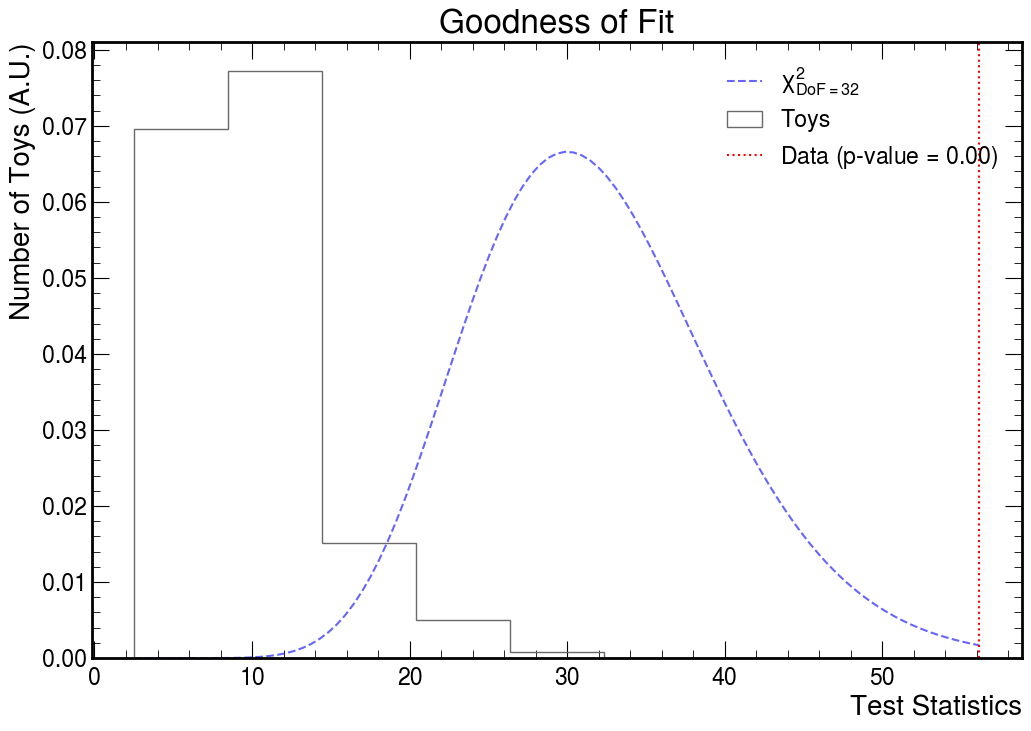

In [60]:
from scipy.stats import chi2

chi2_df = 32

plt.figure(figsize=(12, 8))
x = np.linspace(plot_min, plot_max, 101)
plt.plot(
    x,
    chi2.pdf(x, chi2_df) * 1.3,
    color="blue",
    linestyle="--",
    alpha=0.6,
    label=rf"$\chi^2_{{DoF = {chi2_df}}}$",
)
_ = plt.hist(
    toy_ts,
    np.linspace(plot_min, plot_max, 10),
    density=True,
    color="dimgrey",
    histtype="step",
    label="Toys",
)
plt.axvline(data_ts, color="red", linestyle=":", label=rf"Data ($p$-value = {pval:.2f})")
_ = plt.legend()
plt.title("Goodness of Fit")
plt.ylabel("Number of Toys (A.U.)")
plt.xlabel("Test Statistics")
plt.savefig(f"{plot_dir}/gof_chi2.pdf")